![title](presentation_images/logo_dauphine.png)

# Adversarial Attack Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Some-function-imports" data-toc-modified-id="Some-function-imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some function imports</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Show-some-random-18-images-among-the-50-000-images" data-toc-modified-id="Show-some-random-18-images-among-the-50-000-images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Show some random 18 images among the 50 000 images</a></span></li><li><span><a href="#Show-results-of-our-simple-CNN-on-those-data-(CIFAR10)" data-toc-modified-id="Show-results-of-our-simple-CNN-on-those-data-(CIFAR10)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show results of our simple CNN on those data (CIFAR10)</a></span><ul class="toc-item"><li><span><a href="#Our-model" data-toc-modified-id="Our-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Our model</a></span><ul class="toc-item"><li><span><a href="#Load-the-model" data-toc-modified-id="Load-the-model-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Load the model</a></span></li><li><span><a href="#Model-Architecture" data-toc-modified-id="Model-Architecture-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Model Architecture</a></span></li><li><span><a href="#Model-parameters" data-toc-modified-id="Model-parameters-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Model parameters</a></span></li></ul></li><li><span><a href="#Effectiveness-of-our-model-on-CIFAR10" data-toc-modified-id="Effectiveness-of-our-model-on-CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Effectiveness of our model on CIFAR10</a></span></li></ul></li><li><span><a href="#Show-the-effect-of-an-attack-on-the-model-accuracy" data-toc-modified-id="Show-the-effect-of-an-attack-on-the-model-accuracy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show the effect of an attack on the model accuracy</a></span><ul class="toc-item"><li><span><a href="#Let's-take-one-random-image" data-toc-modified-id="Let's-take-one-random-image-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Let's take one random image</a></span></li><li><span><a href="#How-to-noise-this-image-in-order-to-fool-the-model-?" data-toc-modified-id="How-to-noise-this-image-in-order-to-fool-the-model-?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>How to noise this image in order to fool the model ?</a></span><ul class="toc-item"><li><span><a href="#Show-the-ideal-noise-to-add-to-this-image-to-fool-the-model" data-toc-modified-id="Show-the-ideal-noise-to-add-to-this-image-to-fool-the-model-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Show the ideal noise to add to this image to fool the model</a></span></li><li><span><a href="#First-gradient-sign-method-(FGSM)-effect-depending-on-$\epsilon$" data-toc-modified-id="First-gradient-sign-method-(FGSM)-effect-depending-on-$\epsilon$-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>First gradient sign method (FGSM) effect depending on $\epsilon$</a></span></li><li><span><a href="#PGD-method-effect-depending-on-$\epsilon$-and-number-of-iterations" data-toc-modified-id="PGD-method-effect-depending-on-$\epsilon$-and-number-of-iterations-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>PGD method effect depending on $\epsilon$ and number of iterations</a></span></li></ul></li><li><span><a href="#Effectiveness-of-our-model-on-attacked-data-with-FGSM-with-$\epsilon-=-0.03$" data-toc-modified-id="Effectiveness-of-our-model-on-attacked-data-with-FGSM-with-$\epsilon-=-0.03$-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Effectiveness of our model on attacked data with FGSM with $\epsilon = 0.03$</a></span><ul class="toc-item"><li><span><a href="#Load-Attacked-data" data-toc-modified-id="Load-Attacked-data-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Load Attacked data</a></span></li></ul></li><li><span><a href="#Effectiveness-of-our-model-on-attacked-data-with-PGD-with-$\epsilon-=-0.008$-and-nb_iter-=-$5$" data-toc-modified-id="Effectiveness-of-our-model-on-attacked-data-with-PGD-with-$\epsilon-=-0.008$-and-nb_iter-=-$5$-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Effectiveness of our model on attacked data with PGD with $\epsilon = 0.008$ and nb_iter = $5$</a></span><ul class="toc-item"><li><span><a href="#Load-attacked-data" data-toc-modified-id="Load-attacked-data-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Load attacked data</a></span></li></ul></li></ul></li><li><span><a href="#Show-effectiveness-of-adversarial-training" data-toc-modified-id="Show-effectiveness-of-adversarial-training-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Show effectiveness of adversarial training</a></span><ul class="toc-item"><li><span><a href="#Load-the-model" data-toc-modified-id="Load-the-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Load the model</a></span></li><li><span><a href="#Performance-of-the-model-on-x_test-under-attack-FGSM-with-$\epsilon=0.03$" data-toc-modified-id="Performance-of-the-model-on-x_test-under-attack-FGSM-with-$\epsilon=0.03$-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Performance of the model on x_test under attack FGSM with $\epsilon=0.03$</a></span></li><li><span><a href="#Performance-of-the-model-on-x_test-under-attack-PGD-with-$\epsilon=0.008$-and-nb_iter=$3$" data-toc-modified-id="Performance-of-the-model-on-x_test-under-attack-PGD-with-$\epsilon=0.008$-and-nb_iter=$3$-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Performance of the model on x_test under attack PGD with $\epsilon=0.008$ and nb_iter=$3$</a></span></li><li><span><a href="#Performance-of-the-model-on-x_test-under-attack-PGD-with-$\epsilon=0.008$-and-nb_iter=$5$" data-toc-modified-id="Performance-of-the-model-on-x_test-under-attack-PGD-with-$\epsilon=0.008$-and-nb_iter=$5$-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Performance of the model on x_test under attack PGD with $\epsilon=0.008$ and nb_iter=$5$</a></span></li><li><span><a href="#Performance-of-this-model-on-x_test" data-toc-modified-id="Performance-of-this-model-on-x_test-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Performance of this model on x_test</a></span></li></ul></li><li><span><a href="#Show-robustness-of-a-model-trained-on-not-attacked-data-and-attacked-data" data-toc-modified-id="Show-robustness-of-a-model-trained-on-not-attacked-data-and-attacked-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Show robustness of a model trained on not attacked data and attacked data</a></span><ul class="toc-item"><li><span><a href="#Load-the-model" data-toc-modified-id="Load-the-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Load the model</a></span></li><li><span><a href="#Performance-of-this-model-on-not-attacked-data" data-toc-modified-id="Performance-of-this-model-on-not-attacked-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Performance of this model on not attacked data</a></span></li><li><span><a href="#Performance-of-this-model-on-attacked-data" data-toc-modified-id="Performance-of-this-model-on-attacked-data-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Performance of this model on attacked data</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Other-attacks-and-their-effect-on-standard-model-performance" data-toc-modified-id="Other-attacks-and-their-effect-on-standard-model-performance-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Other attacks and their effect on standard model performance</a></span><ul class="toc-item"><li><span><a href="#Carlini-Infini-attack" data-toc-modified-id="Carlini-Infini-attack-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Carlini Infini attack</a></span><ul class="toc-item"><li><span><a href="#$\epsilon-=-0.03$,-max_iter-=$40$-and-learning_rate=$0.01$" data-toc-modified-id="$\epsilon-=-0.03$,-max_iter-=$40$-and-learning_rate=$0.01$-10.1.1"><span class="toc-item-num">10.1.1&nbsp;&nbsp;</span>$\epsilon = 0.03$, max_iter =$40$ and learning_rate=$0.01$</a></span></li><li><span><a href="#$\epsilon-=-0.25$,-max_iter-=$100$-and-learning_rate=$0.3$" data-toc-modified-id="$\epsilon-=-0.25$,-max_iter-=$100$-and-learning_rate=$0.3$-10.1.2"><span class="toc-item-num">10.1.2&nbsp;&nbsp;</span>$\epsilon = 0.25$, max_iter =$100$ and learning_rate=$0.3$</a></span></li></ul></li><li><span><a href="#Newton-Fool-attack-with-$\epsilon=0.01$,-max_iter-=-$100$-and-btach_size=$1$" data-toc-modified-id="Newton-Fool-attack-with-$\epsilon=0.01$,-max_iter-=-$100$-and-btach_size=$1$-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Newton Fool attack with $\epsilon=0.01$, max_iter = $100$ and btach_size=$1$</a></span></li><li><span><a href="#Basic-iterative-method-attack-with-$\epsilon=0.03$,-$\epsilon\_step-=-0.03$,-max_iter=$40$,-batch_size-=-$1$-and-targeted=$False$" data-toc-modified-id="Basic-iterative-method-attack-with-$\epsilon=0.03$,-$\epsilon\_step-=-0.03$,-max_iter=$40$,-batch_size-=-$1$-and-targeted=$False$-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Basic iterative method attack with $\epsilon=0.03$, $\epsilon\_step = 0.03$, max_iter=$40$, batch_size = $1$ and targeted=$False$</a></span></li></ul></li><li><span><a href="#Further-investigation" data-toc-modified-id="Further-investigation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Further investigation</a></span></li></ul></div>

## Introduction

All models and data used in this notebook have been computed with the code provide in the github. To execute this notebook at home, you will have to performs attacks and specify paths of attacked data in constants.py file.

## Some function imports

In [1]:
import os
import sys
import art
import random 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
cwd = os.path.join(os.getcwd())
sys.path.append(cwd)

# Custom functions
import constants as cst
import import_data
import models
import attack_function
import visualization

Using TensorFlow backend.


## Import data

In [2]:
x_train, y_train, x_test, y_test = import_data.format_data()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Show some random 18 images among the 50 000 images

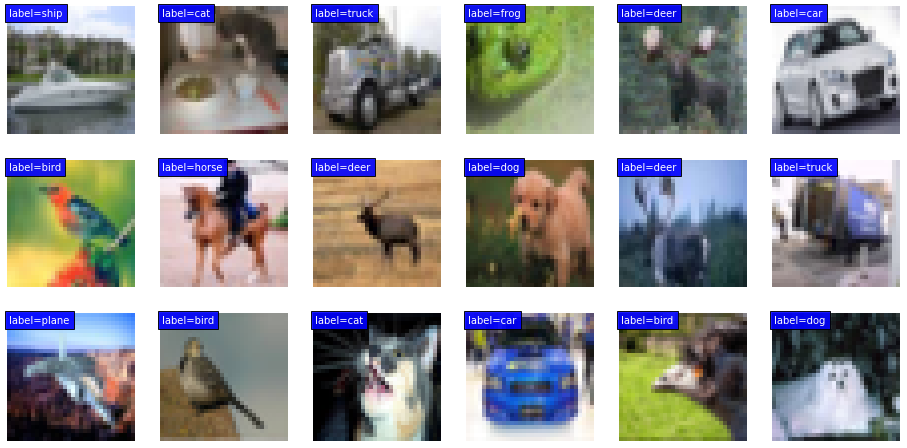

In [3]:
visualization.show_data(x_train, y_train)

## Show results of our simple CNN on those data (CIFAR10)

### Our model

#### Load the model

In [4]:
model = load_model(cst.STANDARD_trained_model)

#### Model Architecture

![title](presentation_images/standard_model_arch.png)

#### Model parameters

- convolutional layers kernel size : $3$
- number of epochs : $100$
- batch_size : $128$
- validation split : $0.1$
- optimizer : Stochastic gradient descent
- learning rate : $0.01$ 

### Effectiveness of our model on CIFAR10

The model performs 78.56% of accuracy on this data, here is a sample


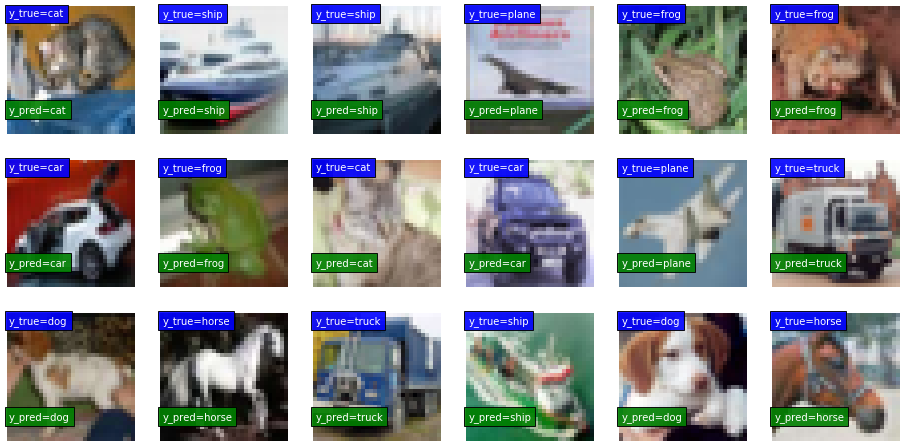

'78.56%'

In [5]:
visualization.show_dataset_and_predictions(x_test, y_test, model)

# Part 1 : Develop classical attacks and simple defense

## Show the effect of an attack on the model accuracy

### Let's take one random image

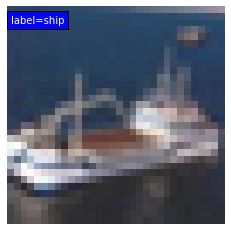

In [6]:
r1 = random.randint(0, 49999)
visualization.show_one_image(x_train, y_train, r1)

### How to noise this image in order to fool the model ?

#### Show the ideal noise to add to this image to fool the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


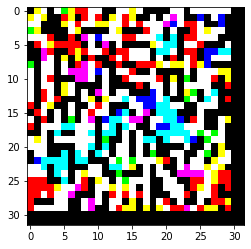

In [7]:
visualization.show_noise(x_train[r1], y_train[r1], model)

But to make the attack interesting, the image has to stay unchanged to the human eye

#### First gradient sign method (FGSM) effect depending on $\epsilon$

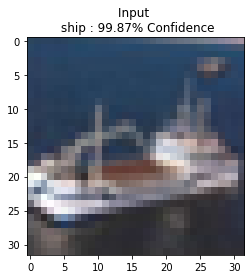

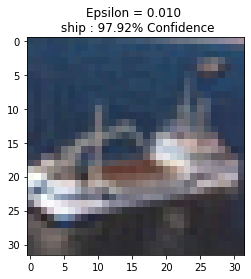

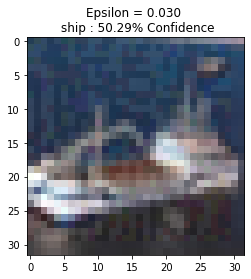

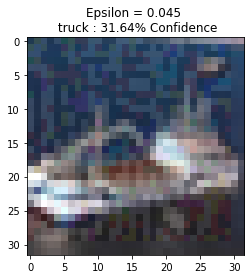

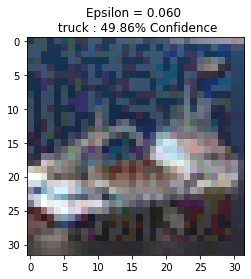

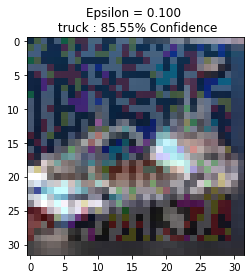

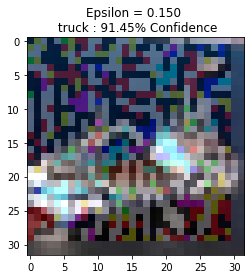

In [8]:
perturbations = visualization.create_adversarial_pattern(x_train[r1], y_train[r1], model)
visualization.show_FGSM_attack_effect(x_train[r1], y_train[r1], perturbations, model)

#### PGD method effect depending on $\epsilon$ and number of iterations

with 5 iterations


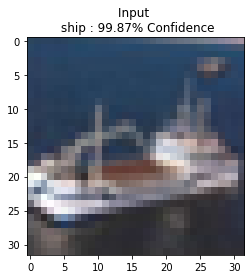

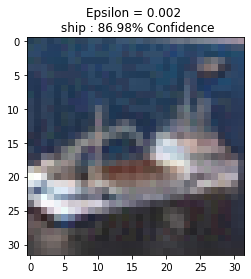

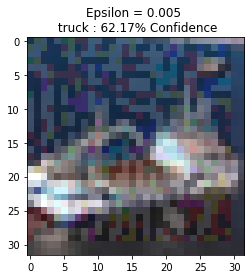

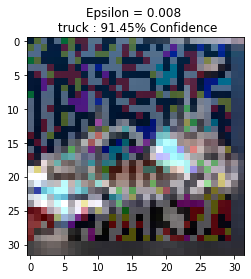

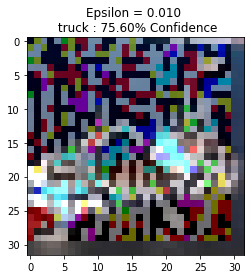

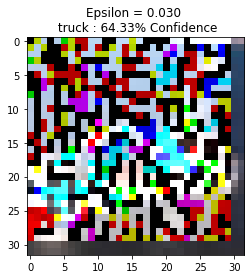

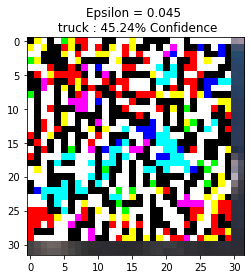

In [9]:
visualization.show_PGD_attack_effect(x_train[r1], y_train[r1], perturbations, 5, model)

### Effectiveness of our model on attacked data with FGSM with $\epsilon = 0.03$

#### Load Attacked data

In [10]:
x_test_attacked_FGSM = np.load(cst.ATTACKED_TEST_FGSM)

The model performs 9.87% of accuracy on this data, here is a sample


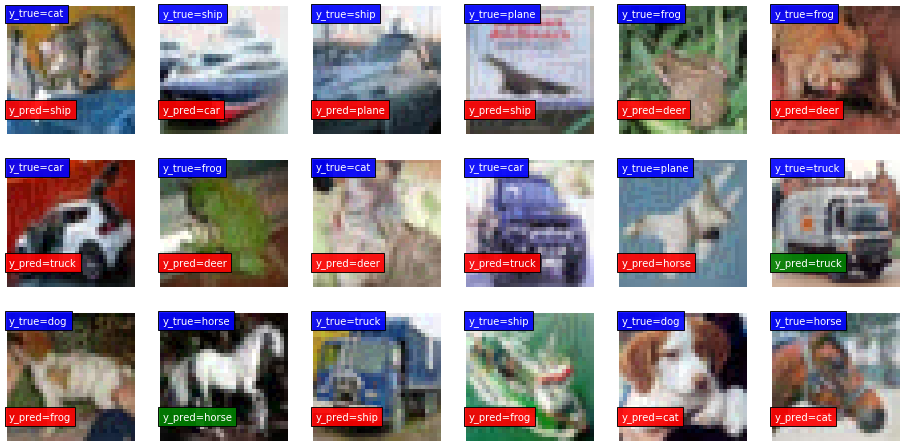

'9.87%'

In [11]:
visualization.show_dataset_and_predictions(x_test_attacked_FGSM, y_test, model)

### Effectiveness of our model on attacked data with PGD with $\epsilon = 0.008$ and nb_iter = $5$

#### Load attacked data

In [12]:
x_test_attacked_PGD = np.load(cst.ATTACKED_TEST_PGD)

The model performs 3.31% of accuracy on this data, here is a sample


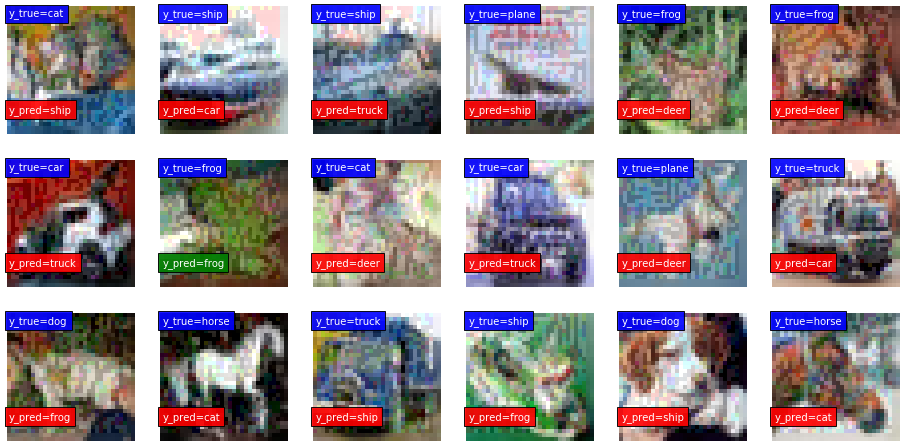

'3.31%'

In [13]:
visualization.show_dataset_and_predictions(x_test_attacked_PGD, y_test, model)

## Show effectiveness of adversarial training

### Load the model

In [14]:
robust_model = load_model(cst.ROBUST_trained_model)

### Performance of the model on x_test under attack FGSM with $\epsilon=0.03$

In [15]:
x_test_robust_attacked_FGSM = np.load(cst.ROBUST_ATTACKED_TEST_FGSM)

The model performs 26.46% of accuracy on this data, here is a sample


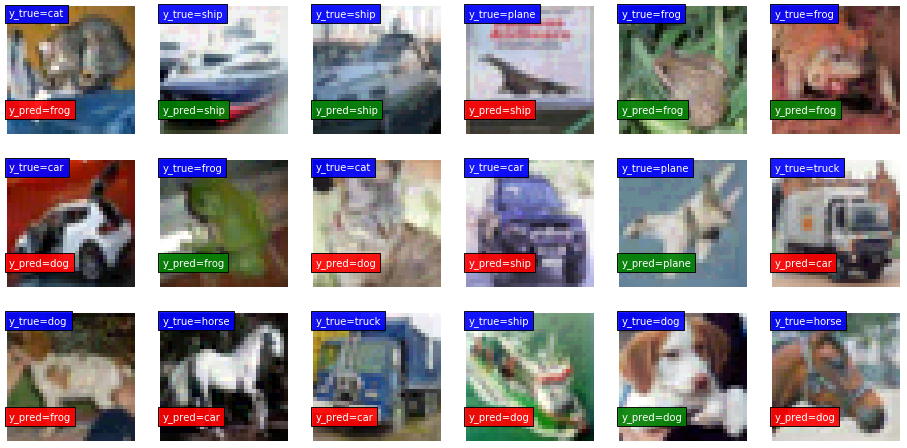

'26.46%'

In [16]:
visualization.show_dataset_and_predictions(x_test_robust_attacked_FGSM, y_test, robust_model)

### Performance of the model on x_test under attack PGD with $\epsilon=0.008$ and nb_iter=$3$

In [17]:
x_test_robust_attacked_PGD = np.load(cst.ROBUST_ATTACKED_TEST_PGD3iter)

The model performs 21.09% of accuracy on this data, here is a sample


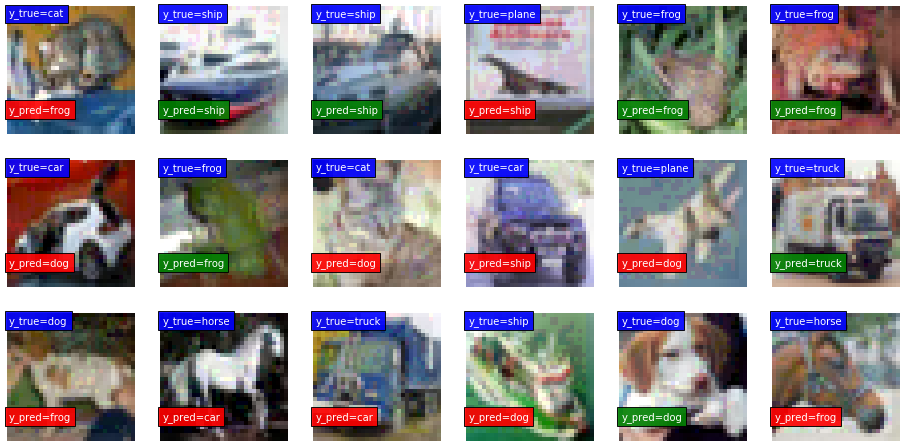

'21.09%'

In [18]:
visualization.show_dataset_and_predictions(x_test_robust_attacked_PGD, y_test, robust_model)

### Performance of the model on x_test under attack PGD with $\epsilon=0.008$ and nb_iter=$5$

In [19]:
x_test_robust_attacked_PGD5 = np.load(cst.ROBUST_ATTACKED_TEST_PGD5iter)

The model performs 13.82% of accuracy on this data, here is a sample


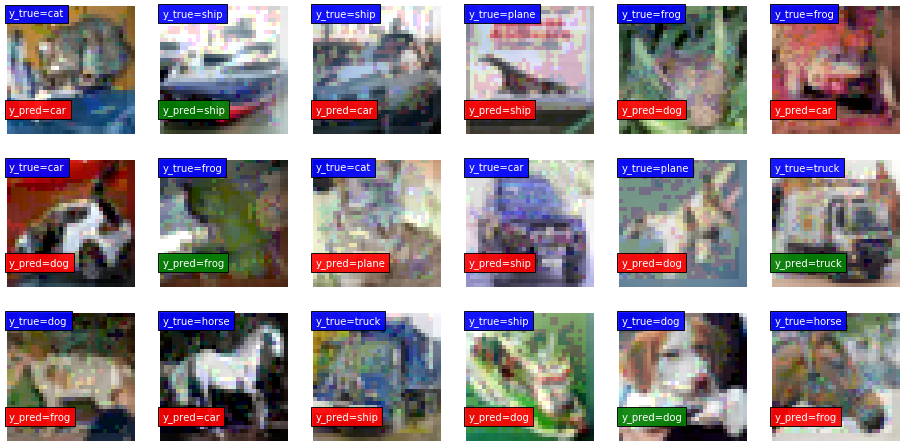

'13.82%'

In [20]:
visualization.show_dataset_and_predictions(x_test_robust_attacked_PGD5, y_test, robust_model)

### Performance of this model on x_test

The model performs 35.46% of accuracy on this data, here is a sample


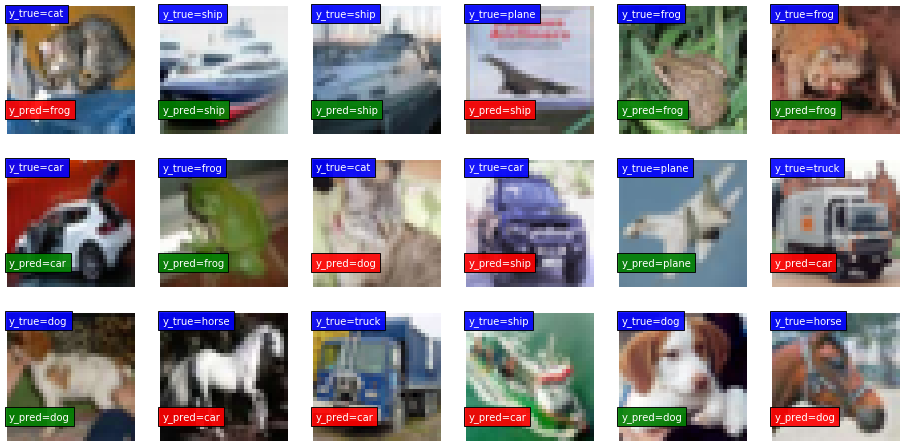

'35.46%'

In [21]:
visualization.show_dataset_and_predictions(x_test, y_test, robust_model)

We can observe that 

# Part 2 : Develop a best defense and see effects of other attacks

## Show robustness of a model trained on not attacked data and attacked data

### Load the model

In [22]:
large_robust_model = load_model(cst.LARGE_ROBUST_trained_model)

### Performance of this model on not attacked data

The model performs 50.11% of accuracy on this data, here is a sample


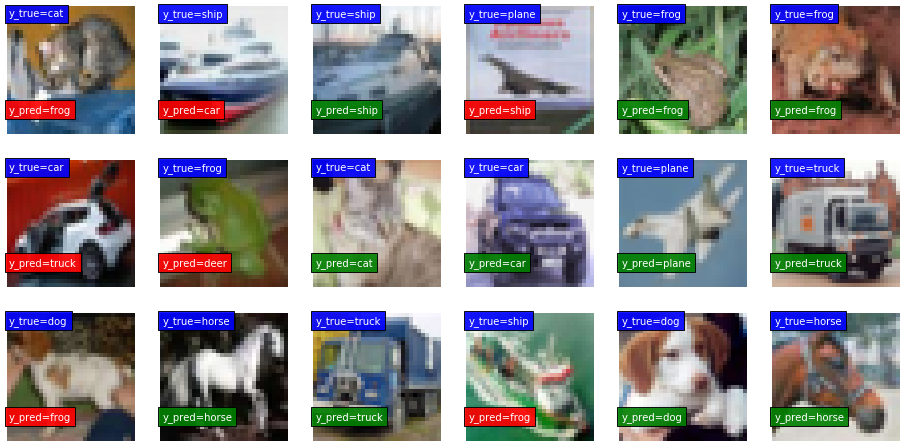

'50.11%'

In [23]:
visualization.show_dataset_and_predictions(x_test, y_test, large_robust_model)

### Performance of this model on attacked data

In [24]:
x_test_attacked_robust_rand_FGSM = np.load(cst.LARGE_ROBUST_ATTACKED_TEST_FGSM)

The model performs 18.09% of accuracy on this data, here is a sample


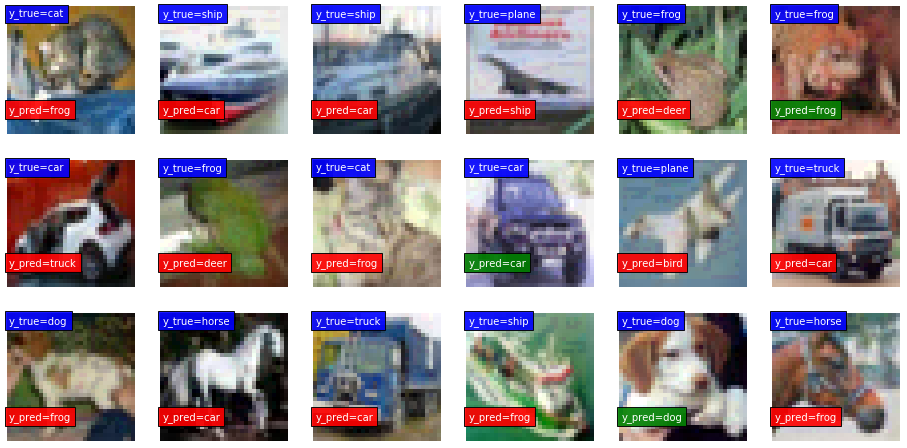

'18.09%'

In [25]:
visualization.show_dataset_and_predictions(x_test_attacked_robust_rand_FGSM, y_test, large_robust_model)

## Summary

|                                                                      	| Accuracy on x_test 	| Accuracy on x_test_attacked FGSM 0.03|
|----------------------------------------------------------------------	|--------------------	|-----------------------------	|
|                            Standard model                            	|       78.56%       	|            9.87%            	|
|             Robust model (1st adversarial training)            	    |       35.46%       	|            26.46%            	|
|             Robust model (2nd adversarial training)            	    |       50.11%       	|            18.09%            	|

There is a clear trade off between natural accuracy and accuracy under attack

## Other attacks and their effect on standard model performance

### Carlini Infini attack

#### $\epsilon = 0.03$, max_iter =$40$ and learning_rate=$0.01$

In [26]:
x_test_attacked_CInf = np.load(cst.ATTACKED_TEST_CInf)

The model performs 22.89% of accuracy on this data, here is a sample


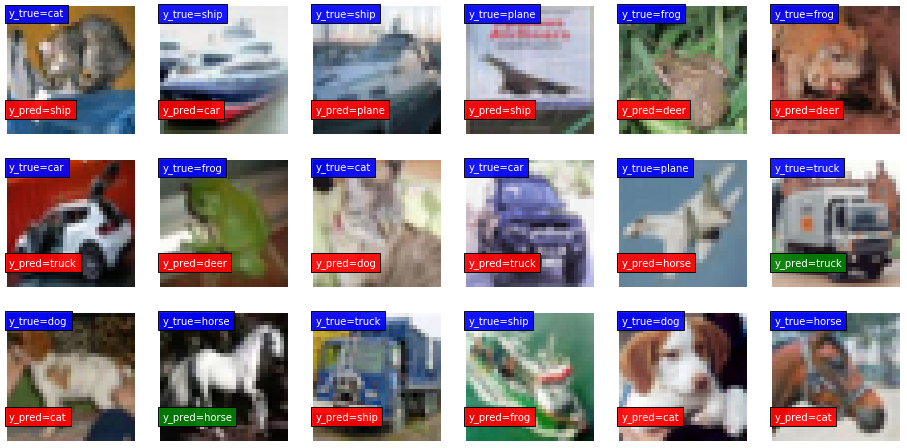

'22.89%'

In [27]:
visualization.show_dataset_and_predictions(x_test_attacked_CInf, y_test, model)

#### $\epsilon = 0.25$, max_iter =$100$ and learning_rate=$0.3$

In [28]:
x_test_attacked_CInf2 = np.load(cst.ATTACKED_TEST_CInf2)

The model performs 11.88% of accuracy on this data, here is a sample


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


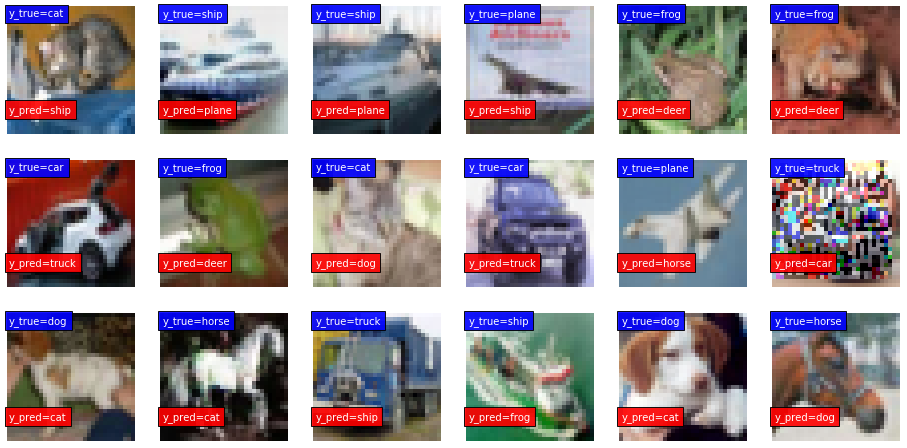

'11.88%'

In [29]:
visualization.show_dataset_and_predictions(x_test_attacked_CInf2, y_test, model)

### Newton Fool attack with $\epsilon=0.01$, max_iter = $100$ and btach_size=$1$

In [30]:
x_test_attacked_NFool = np.load(cst.ATTACKED_TEST_NFool)

The model performs 12.3% of accuracy on this data, here is a sample


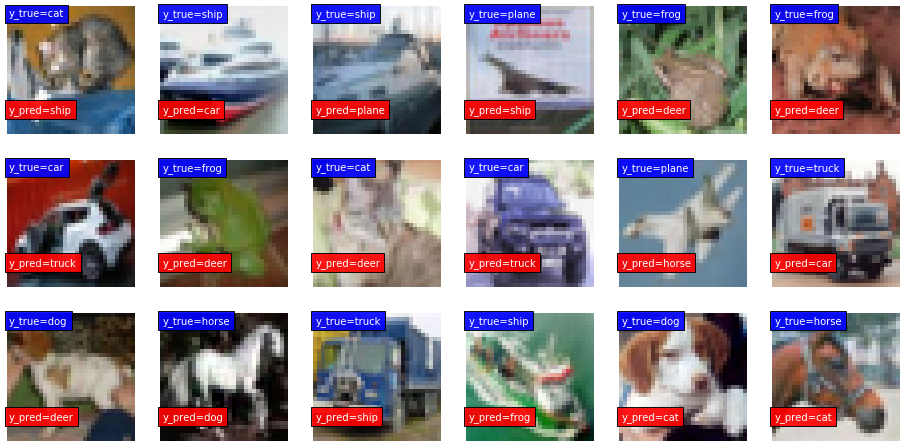

'12.3%'

In [31]:
visualization.show_dataset_and_predictions(x_test_attacked_NFool, y_test, model)

### Basic iterative method attack with $\epsilon=0.03$, $\epsilon\_step = 0.03$, max_iter=$40$, batch_size = $1$ and targeted=$False$

In [32]:
x_test_attacked_BIter = np.load(cst.ATTACKED_TEST_BIter)

The model performs 10.09% of accuracy on this data, here is a sample


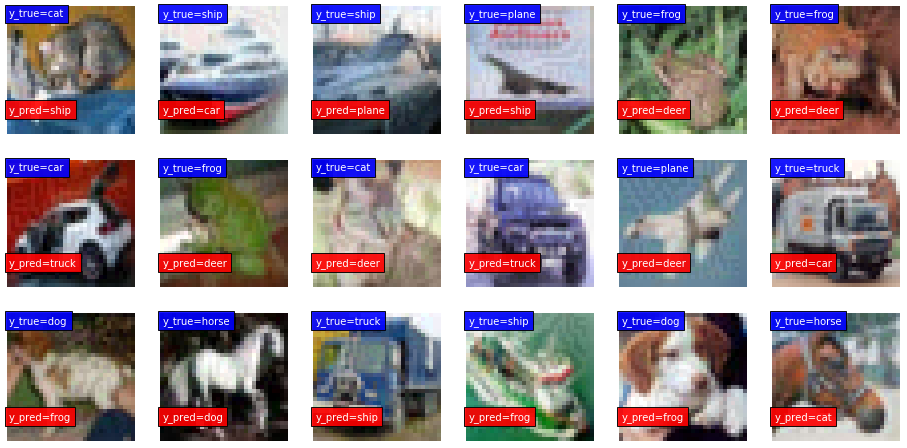

'10.09%'

In [33]:
visualization.show_dataset_and_predictions(x_test_attacked_BIter, y_test, model)

## Further investigation

Further investigation to this project would be to train more robusts models. In fact, the models we trained are pretty simples and didn't train for a very long time.

To perform better in term of natural accuracy, we could have implemented Data augmentation and rotate image in a generator. A further improvement could be to train a better model in term of natural accuracy with data augmentation and try to do adversarial training by testing every attacks on augmented data. 

Another improvement should be to try others architectures and ResNet with more parameters